In [1]:
music = read.csv('./data/music.csv', header = T)

In [2]:
summary(music)

      user                         artist       sex       
 Min.   :    1   radiohead            :  2704   f: 78132  
 1st Qu.: 4935   the beatles          :  2668   m:211823  
 Median : 9838   coldplay             :  2378             
 Mean   : 9852   red hot chili peppers:  1786             
 3rd Qu.:14769   muse                 :  1711             
 Max.   :19718   metallica            :  1670             
                 (Other)              :277038             
           country      
 United States : 59558  
 United Kingdom: 27638  
 Germany       : 24251  
 Poland        : 17111  
 Sweden        : 12379  
 Brazil        : 11922  
 (Other)       :137096  

In [3]:
music$user = factor(music$user)

In [4]:
str(music)

'data.frame':	289955 obs. of  4 variables:
 $ user   : Factor w/ 15000 levels "1","3","4","5",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ artist : Factor w/ 1004 levels "...and you will know us by the trail of dead",..: 715 851 374 281 513 751 289 430 300 896 ...
 $ sex    : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ country: Factor w/ 159 levels "Afghanistan",..: 58 58 58 58 58 58 58 58 58 58 ...


In [5]:
library(arules)

Warning message:
: package ‘arules’ was built under R version 3.2.4Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [7]:
playlist = split(x=music[,"artist"], f=music$user) # split into a list of users
playlist = lapply(playlist, unique) #remove artist duplicates

In [8]:
playlist[1:2]

$`1`
 [1] red hot chili peppers   the black dahlia murder goldfrapp              
 [4] dropkick murphys        le tigre                schandmaul             
 [7] edguy                   jack johnson            eluveitie              
[10] the killers             judas priest            rob zombie             
[13] john mayer              the who                 guano apes             
[16] the rolling stones     
1004 Levels: ...and you will know us by the trail of dead [unknown] ... zero 7

$`3`
 [1] devendra banhart    boards of canada    cocorosie          
 [4] aphex twin          animal collective   atmosphere         
 [7] joanna newsom       air                 portishead         
[10] massive attack      broken social scene arcade fire        
[13] plaid               prefuse 73          m83                
[16] the flashbulb       pavement            goldfrapp          
[19] amon tobin          sage francis        four tet           
[22] max richter         autechre            radiohead          
[25] neutral milk hotel  beastie boys        aesop rock         
[28] mf doom             the books          
1004 Levels: ...and you will know us by the trail of dead [unknown] ... zero 7

In [9]:
playlist = as(playlist,"transactions")

In [10]:
summary(playlist)

transactions as itemMatrix in sparse format with
 15000 rows (elements/itemsets/transactions) and
 1004 columns (items) and a density of 0.01925319 

most frequent items:
            radiohead           the beatles              coldplay 
                 2704                  2668                  2378 
red hot chili peppers                  muse               (Other) 
                 1786                  1711                278706 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
185 222 280 302 359 385 472 461 491 501 504 482 472 471 479 477 456 455 444 455 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
436 478 426 438 408 446 417 375 348 340 316 293 274 286 238 208 193 181 128 102 
 41  42  43  44  45  46  47  48  49  50  51  52  54  55  63  76 
 93  61  55  36  23  15   6  11   2   1   5   3   1   2   1   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 

In [11]:
str(playlist)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:289953] 280 288 299 373 383 429 457 468 512 714 ...
  .. .. ..@ p       : int [1:15001] 0 16 45 72 83 106 128 147 177 184 ...
  .. .. ..@ Dim     : int [1:2] 1004 15000
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	1004 obs. of  1 variable:
  .. ..$ labels: chr [1:1004] "...and you will know us by the trail of dead" "[unknown]" "2pac" "3 doors down" ...
  ..@ itemsetInfo:'data.frame':	15000 obs. of  1 variable:
  .. ..$ transactionID: chr [1:15000] "1" "3" "4" "5" ...


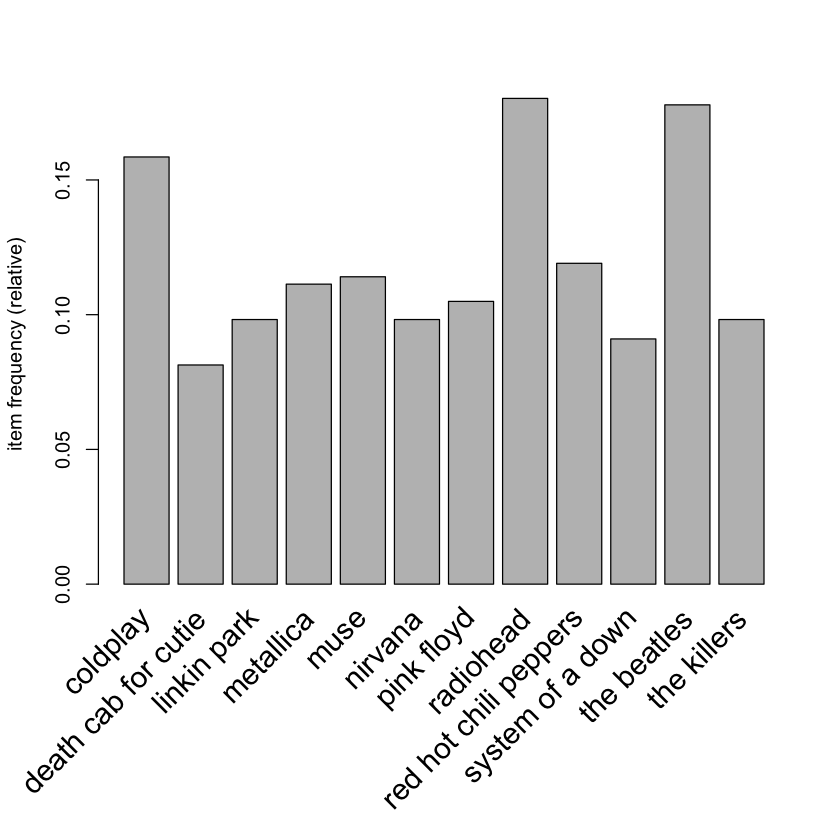

In [12]:
itemFrequencyPlot(playlist,support=0.08, cex.names = 1.5)

In [13]:
musicrules = apriori(playlist,parameter = list(support=0.01, confidence =.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.5    0.1    1 none FALSE            TRUE    0.01      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1004 item(s), 15000 transaction(s)] done [0.02s].
sorting and recoding items ... [655 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.02s].
writing ... [50 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [14]:
inspect(musicrules)

   lhs                                    rhs            support    confidence
1  {t.i.}                              => {kanye west}   0.01040000 0.5672727 
2  {the pussycat dolls}                => {rihanna}      0.01040000 0.5777778 
3  {the fray}                          => {coldplay}     0.01126667 0.5168196 
4  {sonata arctica}                    => {nightwish}    0.01346667 0.5101010 
5  {judas priest}                      => {iron maiden}  0.01353333 0.5075000 
6  {the kinks}                         => {the beatles}  0.01360000 0.5298701 
7  {travis}                            => {coldplay}     0.01373333 0.5628415 
8  {the flaming lips}                  => {radiohead}    0.01306667 0.5297297 
9  {megadeth}                          => {metallica}    0.01626667 0.5281385 
10 {simon & garfunkel}                 => {the beatles}  0.01540000 0.5238095 
11 {broken social scene}               => {radiohead}    0.01506667 0.5472155 
12 {blur}                              => {radiohead